In [4]:
import numpy as np
import os
from astropy.io import fits
import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit
# from scipy.linalg import lstsq
# from scipy import signal

from mpl_toolkits.mplot3d import Axes3D

In [5]:
from simple_veloce_reduction import veloce_extraction, veloce_reduction_tools, veloce_wavecalib, veloce_config

In [6]:
arm_n = {'blue':1, 'green':2, 'red':3}
# REPETITION_RATE = 25e9  # Hz
# OFFSET_FREQUENCY = 9.56e9  # Hz

In [7]:
def load_fits_file(filename, veloce_paths, date, arm, amplifier_mode=4):
    spectrum_filename =  os.path.join(veloce_paths.input_dir, date, f'ccd_{arm_n[arm]}', filename)
    with fits.open(spectrum_filename) as hdul:
        image_data = hdul[0].data
        header = hdul[0].header
    image_substracted_bias = veloce_reduction_tools.remove_overscan_bias(image_data, overscan_range=32, hdr=header, amplifier_mode=amplifier_mode)
    
    return image_substracted_bias, header

In [8]:
# def load_sim_lc(image, veloce_paths, hdr, arm, lc_ref=None):
#     """
#     Load simultaneous laser comb observations.
#     """
#     if hdr is not None and (hdr['FREQREF'] != REPETITION_RATE and hdr['FOFFFREQ'] != OFFSET_FREQUENCY):
#         raise ValueError("Repetition rate and offset frequency do not match the values of LC solution.")
#     traces = veloce_reduction_tools.Traces.load_traces(os.path.join(veloce_paths.trace_dir, f'veloce_{arm}_LC_trace.pkl'))
    
#     extracted_LC, extracted_LC_imgs = veloce_reduction_tools.extract_orders_with_trace(image, traces)

#     extracted_pixel = list(range(len(extracted_LC)))
#     if lc_ref is not None:
#         if len(np.unique(lc_ref['order'])) != len(extracted_LC):
#             print("[Warning]: Reference LC and extracted LC do not have the same number of orders.")
#             order_slice = slice(int(min(np.unique(lc_ref['order'])-1)), int(max(np.unique(lc_ref['order']))))
#             extracted_LC = extracted_LC[order_slice]
#         for i, order in enumerate(np.unique(lc_ref['order'])):
#             pixel_slice = slice(int(min(lc_ref[lc_ref['order']==order]['pixel'])-1), int(max(lc_ref[lc_ref['order']==order]['pixel'])))
#             extracted_LC[i] = extracted_LC[i][pixel_slice]
#             extracted_pixel[i] = lc_ref[lc_ref['order']==order]['pixel']
#     else:
#         for i in range(len(extracted_LC)):
#             extracted_pixel[i] = np.arange(len(extracted_LC[i]), dtype=int)+1

#     return extracted_LC, extracted_pixel

In [9]:
# run = 'CSV_Run'
run = 'TauCeti_archive'
# run = '23xmasRun'
# run = 'Delta_Call_2025_accretion'
# input_dir = '/home/usqobserver2/VeloceData/CSV_Run/'
input_dir = f'/home/usqobserver2/VeloceData/{run}/'
output_dir = '/home/usqobserver2/Joachim_veloce/Extracted_data/LC/'
veloce_paths = veloce_config.VelocePaths(input_dir, output_dir, run=run)

 does not match run name: TauCeti_archive


In [10]:
arm = 'red'
# arm = 'green'

In [11]:
ref_orders, ref_wave, ref_intensity, ref_pixel = veloce_wavecalib.load_LC_wave_reference(veloce_paths, arm)

In [12]:
# def pad_array(array, ref_pixel):
#     """
#     Pad an array to create 2D array with the size matching min and max of reference pixels.
#     """
#     lower_bound = min([np.nanmin(order) for order in ref_pixel])
#     upper_bound = max([np.nanmax(order) for order in ref_pixel])
#     print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
#     padded_array = np.array(
#         [np.pad(order, (int(np.nanmin(ref_pixel[i])-lower_bound), int(upper_bound-np.nanmax(ref_pixel[i]))), constant_values=np.nan)
#          for i, order in enumerate(array)])

#     return padded_array
    

In [13]:
# orders = np.unique(LC_ref['order'])
# ref_wave = [LC_ref[LC_ref['order'] == order]['wave'] for order in orders]
# ref_intensity = [LC_ref[LC_ref['order'] == order]['flux'] for order in orders]
# ref_pixel = [LC_ref[LC_ref['order'] == order]['pixel'] for order in orders]
# ref_pixel = pad_array(ref_pixel, ref_pixel)
# ref_wave = pad_array(ref_wave, ref_pixel)
# ref_intensity = pad_array(ref_intensity, ref_pixel)

In [14]:
# filename = f'26aug{arm_n[arm]}0083.fits' # LC
# filename = f'24aug{arm_n[arm]}0085.fits' # LC
# filename = f'24aug{arm_n[arm]}0232.fits' # LC
# filename = f'26aug{arm_n[arm]}0157.fits' # LC
# filename = f'23dec{arm_n[arm]}0110.fits' # LC
# filename = f'06apr{arm_n[arm]}0129.fits' # LC
filename = '31oct30197.fits' # tau Ceti
# spectrum_filename =  os.path.join(veloce_paths.input_dir, '230824', f'ccd_{arm_n[arm]}', filename)
# date = '230826'
date = '231031' 
# spectrum_filename =  os.path.join(veloce_paths.input_dir, '231223', f'ccd_{arm_n[arm]}', filename)
# spectrum_filename =  os.path.join(veloce_paths.input_dir, '250406', f'ccd_{arm_n[arm]}', filename)

lc_image, header = load_fits_file(filename, veloce_paths, date, arm, amplifier_mode=4)

Gain for quadrant 1: 1.01
Gain for quadrant 2: 1.01
Gain for quadrant 3: 1.01
Gain for quadrant 4: 1.01


In [15]:
plt.close('all')

In [16]:
traces = veloce_extraction.load_trace_data(arm, veloce_paths.trace_dir, sim_calib=True, filename='Default')

lc_traces = veloce_reduction_tools.Traces.load_traces(os.path.join(veloce_paths.trace_dir, f'veloce_{arm}_LC_trace.pkl'))


In [17]:
%matplotlib widget

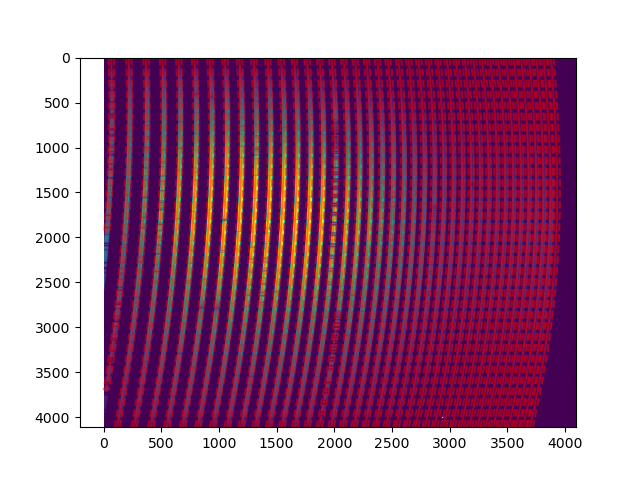

In [18]:
plt.imshow(lc_image, vmin=np.min(lc_image), vmax=np.percentile(lc_image, 98), aspect='auto')
for y, x, lower, upper in traces:
    plt.plot(x, y, color='red', alpha=0.5)
    plt.plot(x-lower, y, color='red', ls='--', alpha=0.5)
    plt.plot(x+upper, y, color='red', ls='--', alpha=0.5)

In [19]:
plt.close()

In [20]:
lc_intensity, lc_pixel, order_slices, pix_slices = veloce_wavecalib.load_simultanous_LC(lc_image, veloce_paths, header, arm, ref_orders=ref_orders, ref_pixel=ref_pixel)

In [21]:
# def modify_lc_order(data, order, shift=0):
#     order_data = data[data['order'] == order]
#     wave = order_data['wave']
#     # _intensity =  order_data['flux'] + np.random.normal(0,1,order_data['flux'].shape[0])
#     _intensity =  order_data['flux']
#     _intensity[_intensity < 0] = 0
#     pixel = order_data['pixel']
#     # _pixel = order_data['pixel'] + np.random.normal(shift,0.001,order_data['pixel'].shape[0])
#     _pixel = order_data['pixel'] + shift
#     intensity = np.interp(pixel, _pixel, _intensity)
    
#     return wave, intensity, pixel

In [22]:
# def shift_lc_pixel(pixel, _intensity, shift=0):
#     # _pixel = order_data['pixel'] + np.random.normal(shift,0.001,order_data['pixel'].shape[0])
#     _pixel = pixel + shift
#     intensity = np.interp(pixel, _pixel, _intensity)
    
#     return intensity

In [23]:
# def calculate_ccf(pixel, intensity, pixel_ref, intensity_ref, min=-50, max=50, step=0.1):
#     # verify that pixel_ref and pixel are in the same range
#     # if pixel_ref != pixel:
#     #     raise ValueError("pixel_ref and pixel must be the same")
#     # ccf = []
#     # pix_shift = np.arange(min, max, step)
#     # for shift in pix_shift:
#     #     pix = pixel_ref + shift
#     #     ref_ = np.interp(pixel, pix, intensity_ref)
#     #     ccf.append(np.dot(intensity, ref_))
#     # ccf = signal.fftconvolve(intensity, intensity_ref[::-1], mode='full')

#     # ccf = signal.fftconvolve(intensity, intensity_ref, mode='full')
#     pix_shift = np.arange(-len(pixel_ref)+1, len(pixel_ref), 1)
#     ccf = np.correlate(intensity, intensity_ref, mode='full')
#     return pix_shift, np.array(ccf)

In [24]:
# def gaussian(x, amp, mean, stddev):
#         return amp * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

In [25]:
# def general_gaussian(x, A, mu, sigma, beta):
#         return A * np.exp(-np.abs(((x - mu)/(np.sqrt(2)*sigma)))**beta)

In [26]:
# def fit_peak(pix_shift, ccf, plot=False):
#     pix_shift = pix_shift[~np.isnan(pix_shift)]
#     ccf = ccf[~np.isnan(ccf)]
#     if len(pix_shift) == 0 or len(ccf) == 0:
#         return np.nan, [np.nan, np.nan, np.nan]
#     # consider peak near 0 pixel shift
#     fitting_limit = np.ceil(np.mean(np.diff(signal.find_peaks(ccf)[0])))/2
#     _pix_shift = pix_shift[abs(pix_shift) <= fitting_limit]
#     _ccf = ccf[abs(pix_shift) <= fitting_limit]
#     _ccf -= np.min(_ccf)

#     # fit a gaussian to the peak
#     peak_arg = np.argmax(_ccf)
#     # peak_position = 0
#     # peak_arg = np.where(_pix_shift == peak_position)
#     # peak = _ccf[peak_arg][0]
#     peak = _ccf[peak_arg]
#     peak_position = _pix_shift[peak_arg]
#     print(f'Peak Position: {peak_position}, Peak Value: {peak}')
#     # sigma = 0.45
#     sigma = 0.8
#     beta = 2.0

#     plt.plot(_pix_shift, general_gaussian(_pix_shift, peak, peak_position, sigma, beta))

#     popt, _ = curve_fit(general_gaussian, _pix_shift, _ccf, p0=[peak, peak_position, sigma, beta], bounds=([0, np.min(_pix_shift), 1e-3, 1e-3], [2*peak, np.max(_pix_shift), 10, 10]))

#     if abs(popt[1]) > 1 and plot:
#         plt.figure(figsize=(10, 6))
#         plt.title('Cross-Correlation Function')
#         plt.plot(_pix_shift, _ccf, label=f'ccf')
#         plt.plot(_pix_shift, general_gaussian(_pix_shift, *popt), label='Gaussian Fit', linestyle='--')
#         plt.axvline(popt[1], color='r', linestyle='--', label='Peak Position')
#         plt.axhline(0, color='k', linestyle='--')
#         # plt.title(f'Cross-Correlation Function for Order {order}, Shift = {popt[1]:.2f}')
#         plt.xlabel('Pixel Shift')
#         plt.ylabel('Cross-Correlation')
#         plt.xlim(-50, 50)
#         plt.legend()
#         plt.grid()
#         plt.show()
#         plt.clf()

#     return popt[1], popt

In [27]:
# test = np.array([np.nan, np.nan, np.nan])
# np.correlate(test[~np.isnan(test)], test[~np.isnan(test)], mode='full')

In [28]:
# def plot_ccf(PIX, CCF, order, chunk):
#     plt.figure(figsize=(10, 6))
#     plt.title('Cross-Correlation Function')
#     plt.plot(PIX[order-1][chunk], CCF[order-1][chunk], label=f'Order {order}')
#     shift, popt = veloce_wavecalib.fit_lc_peak(PIX[order-1][chunk], CCF[order-1][chunk])
#     print(popt)
#     subpixel = np.arange(np.min(PIX[order-1][chunk]), np.max(PIX[order-1][chunk]), 0.01)
#     plt.plot(subpixel, veloce_wavecalib.general_gaussian(subpixel, *popt), label='Gaussian Fit', linestyle='--')
#     plt.axvline(shift, color='r', linestyle='--', label='Peak Position')
#     plt.title(f'Cross-Correlation Function for Order {order}, Shift = {popt[1]:.2f}')
#     plt.xlabel('Pixel Shift')
#     plt.ylabel('Cross-Correlation')
#     plt.xlim(-10, 10)
#     plt.legend()
#     plt.grid()
#     plt.show()

In [29]:
# def plot_offset_map(dispersion_position, orders_position, offset_array):
#     """
#     Plot the offset map in 3D.
#     """    
#     fig = plt.figure(figsize=(8, 8))
#     ax = fig.add_subplot(111, projection='3d')
#     points = ax.scatter(dispersion_position.flatten(), orders_position.flatten(), offset_array.flatten(), c=offset_array.flatten(), cmap='viridis', marker='o')
#     ax.set_title('Offset Map')
#     ax.set_xlabel('Dispersion Position')
#     ax.set_ylabel('Orders')
#     ax.set_zlabel('Offset')
#     fig.colorbar(points, shrink=0.5, aspect=10)
#     plt.show()

In [30]:
# CCF = []
# PIX = []
# dispersion_position = []
# for order, wave_ref, intensity_ref, pixel_ref, intensity, pixel in zip(ref_orders, ref_wave, ref_intensity, ref_pixel, lc_intensity, lc_pixel):
#     # wave, intensity, pixel = get_lc_order_with_noise(LC_data, order, shift=0.34)
#     intensity = shift_lc_pixel(pixel, intensity, shift=2.0)
#     # wave_ref, intensity_ref, pixel_ref = veloce_wavecalib.get_lc_order(LC_ref, order)
#     # if order == 20:
#     #     plt.plot(pixel, intensity, 'r', label='Modified')
#     #     plt.plot(pixel_ref, intensity_ref, 'b', label='Original')
#     #     plt.title(f'Order {order}')
#     #     plt.xlabel('Pixel')
#     #     plt.ylabel('Intensity')
#     #     plt.xlim(2200, 2250)
#     #     plt.show()
#     pix_shift, ccf, position = [], [], []
#     for _pixel, _intensity, _pixel_ref, _intensity_ref in zip(np. array_split(pixel, 8), np. array_split(intensity, 8), np. array_split(pixel_ref, 8), np. array_split(intensity_ref, 8)):
#         _pix_shift, _ccf = veloce_wavecalib.calculate_lc_ccf(_pixel, _intensity, _pixel_ref, _intensity_ref)
#         pix_shift.append(_pix_shift)
#         ccf.append(_ccf)
#         position.append(np.mean(_pixel))
#     dispersion_position.append(position)
#     CCF.append(ccf)
#     PIX.append(pix_shift)

In [31]:
# wave, intensity, pixel = get_order_data(LC_data, 1, shift=0.34, modify=True)
# wave_ref, intensity_ref, pixel_ref = get_order_data(LC_data, 1)
# plt.plot(pixel, intensity, 'r', label='Modified')
# plt.plot(pixel_ref, intensity_ref, 'b', label='Original')
# plt.title(f'Order {order}')
# plt.xlabel('Pixel')
# plt.ylabel('Intensity')
# plt.xlim(1200, 1400)
# plt.show()

In [32]:
# def plot_offset_map(orders, CCF, PIX, dispersion_position):
#     dispersion_position = np.array(dispersion_position)
#     orders_position = np.repeat(np.array(orders).reshape(len(orders), 1), dispersion_position.shape[1], axis=1)
#     offset_array = np.zeros((len(orders), len(PIX[0])))
#     for i in range(len(orders)):
#         for j in range(len(CCF[i])):
#             offset, popt = veloce_wavecalib.fit_lc_peak(PIX[i][j], CCF[i][j])
#             offset_array[i][j] = offset
#             if offset > 2:
#                 print(f"Order {orders[i]}, Chunk {j}, Offset: {offset:.2f}")

#     fig = plt.figure(figsize=(12, 8))
#     ax = fig.add_subplot(111, projection='3d')
#     # X, Y = np.meshgrid(dispersion_position[0], orders)
#     # Z = offset_array
#     # surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
#     points = ax.scatter(dispersion_position.flatten(), orders_position.flatten(), offset_array.flatten(), c=offset_array.flatten(), cmap='viridis', marker='o')
#     ax.set_title('Offset Map')
#     ax.set_xlabel('Dispersion Position')
#     ax.set_ylabel('Orders')
#     ax.set_zlabel('Offset')
#     fig.colorbar(points, shrink=0.5, aspect=10)
#     plt.show()

In [33]:
# %matplotlib inline
%matplotlib widget

In [34]:
# def calculate_offset_map(ref_orders, ref_intensity, ref_pixel, lc_intensity, lc_pixel, number_of_parts=8, plot=False):
#     """
#     Calculate the cross-correlation function (CCF) for each order of the laser comb.
#     """
#     CCF = [
#         [
#             np.correlate(_intensity, _intensity_ref, mode='full')
#             if np.isnan(_intensity).any() == False and np.isnan(_intensity_ref).any() == False
#             else np.array([np.nan])
#             # else np.empty(len(_intensity)+len(_intensity_ref)-1).fill(np.nan)
#             for _intensity, _intensity_ref in zip(
#                 np.array_split(intensity, number_of_parts),
#                 np.array_split(intensity_ref, number_of_parts)
#             )
#         ]
#         for intensity_ref, intensity in zip(ref_intensity, lc_intensity)
#     ]
#     pixel_shifts =  [
#         [
#             np.arange(-len(_pixel_ref) + 1, len(_pixel_ref), 1)
#             for _pixel_ref in np.array_split(pixel_ref, number_of_parts)
#         ]
#         for pixel_ref in ref_pixel
#     ]
#     dispersion_position = np.array([
#         [
#             np.mean(_pixel)
#             for _pixel in np.array_split(pixel, number_of_parts)
#         ]
#         for pixel in lc_pixel
#     ])

#     orders_position = np.repeat(np.array(ref_orders).reshape(len(ref_orders), 1), dispersion_position.shape[1], axis=1)
#     # offset_array = np.array([[veloce_wavecalib.fit_lc_peak(pixel_shifts[i][j], CCF[i][j])[0] for j in range(len(CCF[i]))] for i in range(len(ref_orders))])
#     offset_array = np.array([[veloce_wavecalib.fit_lc_peak(pixel_shifts[i][j], CCF[i][j])[0] for j in range(number_of_parts)] for i in range(len(ref_orders))])
    
#     if plot:
#         plot_ccf(pixel_shifts, CCF, 15, 4)
#         plot_offset_map(dispersion_position, orders_position, offset_array)

#     return dispersion_position, orders_position, offset_array

/home/usqobserver2/anaconda3/envs/reduce_spectro/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


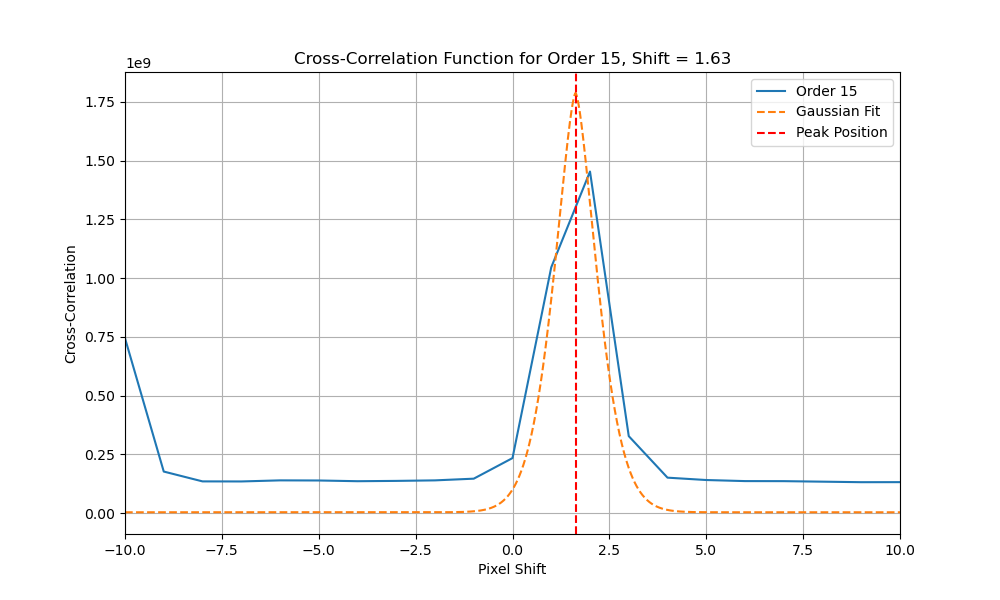

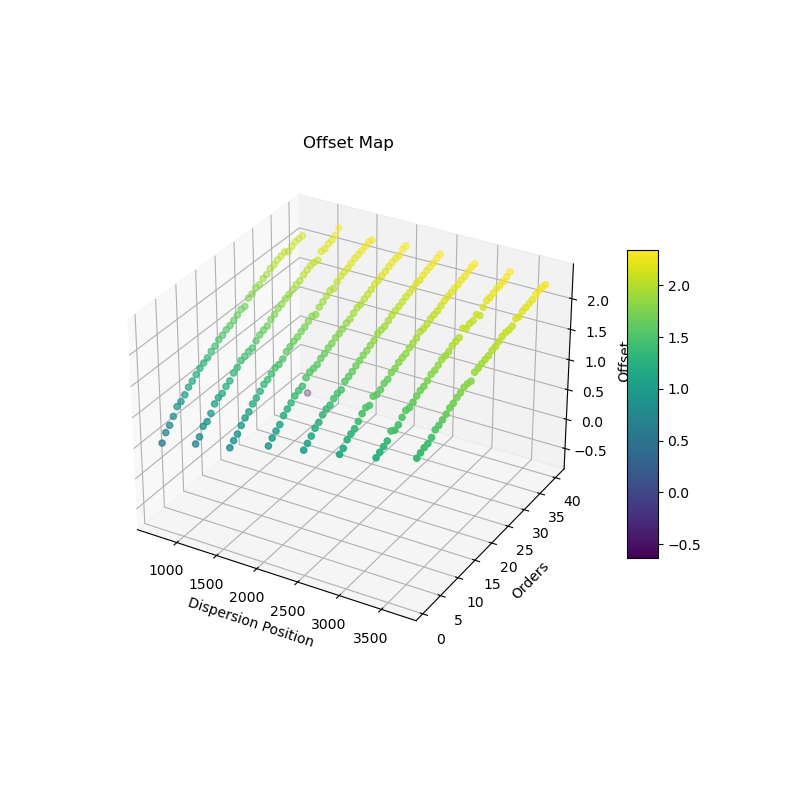

In [35]:
# dispersion_position, orders_position, offset_array = veloce_wavecalib.offset_map(np.unique(LC_ref['order']), CCF, PIX, dispersion_position, plot=True)
dispersion_position, orders_position, offset_array = veloce_wavecalib.calculate_offset_map(ref_orders, ref_intensity, ref_pixel, lc_intensity, lc_pixel, plot=True)

In [36]:
plt.close('all')

In [37]:
# from scipy.interpolate import LinearNDInterpolator

# def fit_offsets(dispersion_position, orders_position, offset_array, extracted_pixels, kernel='linear', smoothing=1, degree=0, downsample_factor=0.1):
#     """
#     Fit offsets using Radial Basis Function (RBF) interpolation.
#     """
#     # # verify x_range
#     # for i in range(len(traces)-1):
#     #     if np.any((traces.x[i][::y_step]+traces.x[i+1][::y_step])/2+x_range>traces.x[i+1]-traces.summing_ranges_lower) or np.any((traces.x[i][::y_step]+traces.x[i+1][::y_step])/2-x_range>traces.x[i]+traces.summing_ranges_upper):
#     #        raise ValueError(f'x_range = {x_range} is too large for the given traces.')
#     # # verify y_step
#     # if frame.shape[0]/y_step < 100:
#     #     raise ValueError(f'y_step = {y_step} is too big for the frame resulting grid is too sparse.')
    
#     values = offset_array.flatten()
#     points = [(x, y) for x, y in zip(dispersion_position.flatten(), orders_position.flatten())]
#     points = np.vstack(points)
#     # Create the RBF interpolator
#     # rbf = RBFInterpolator(points, values, kernel=kernel, smoothing=smoothing, degree=degree)
#     surf = LinearNDInterpolator(points, values, fill_value=np.nan)

#     # Create a grid for the interpolation
#     lower_bound = min([min(order) for order in extracted_pixels])
#     upper_bound = max([max(order) for order in extracted_pixels])
#     # print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
#     extracted_pixels_padded = np.array([np.pad(order, (int(order[0]-lower_bound), int(upper_bound-order[-1])), constant_values=np.nan) for order in extracted_pixels])
#     # extracted_pixels_padded = []
#     # for order in extracted_pixels:
#     #     print(lower_bound-order[0], upper_bound-order[-1])
#     #     order = np.pad(order, (int(lower_bound-order[0]), int(upper_bound-order[-1])), constant_values=np.nan)
#     #     extracted_pixels_padded.append(order)
#     # max_length = max([len(order) for order in extracted_pixels])
#     # extracted_pixels_padded = np.array([np.pad(order, (0, max_length - len(order)), constant_values=np.nan) for order in extracted_pixels])
#     grid_points = [[(pixel,i+1) for pixel in extracted_pixels_padded[i]] for i in range(len(extracted_pixels_padded))]
#     grid_points = np.vstack(grid_points)

#     offsets = surf(grid_points).reshape(extracted_pixels_padded.shape)
#     # offsets = rbf(grid_points).reshape(extracted_pixels_padded.shape)
#     # # Create a downsampled grid for the interpolation
#     # grid_shape = offset_array.shape
#     # downsampled_shape = (int(grid_shape[0] * downsample_factor), int(grid_shape[1] * downsample_factor))
#     # grid_y, grid_x = np.mgrid[0:grid_shape[0]:downsampled_shape[0]*1j, 0:grid_shape[1]:downsampled_shape[1]*1j]
#     # grid_points = np.vstack((grid_y.ravel(), grid_x.ravel())).T
#     # # Interpolate on the downsampled grid
#     # downsampled_background = rbf(grid_points).reshape(downsampled_shape)
#     # # Upsample the interpolated background to the original grid shape
#     # offsets = zoom(downsampled_background, (grid_shape[0] / downsampled_shape[0], grid_shape[1] / downsampled_shape[1]), order=1)

#     return offsets, extracted_pixels_padded 

In [38]:
# from scipy.linalg import lstsq

# def fit_surface(dispersion_position, orders_position, offset_array, extracted_pixels, order=1):
#     """
#     Fit a surface to the offset map using least squares.

#     Fitting procedure from: https://gist.github.com/amroamroamro/1db8d69b4b65e8bc66a6
#     """
    
#     data = np.array([(x, y, z) for x, y, z in zip(dispersion_position.flatten(), orders_position.flatten(), offset_array.flatten())])
#     # Create a grid for the interpolation
#     lower_bound = min([min(order) for order in extracted_pixels])
#     upper_bound = max([max(order) for order in extracted_pixels])
#     extracted_pixels_padded = np.array([np.pad(order, (int(order[0]-lower_bound), int(upper_bound-order[-1])), constant_values=np.nan) for order in extracted_pixels])
#     grid_points = [[(pixel,i+1) for pixel in extracted_pixels_padded[i]] for i in range(len(extracted_pixels_padded))]
#     grid_points = np.vstack(grid_points)
#     # XX = grid_points[:,0].flatten()
#     # YY = grid_points[:,1].flatten()
#     # X, Y = np.meshgrid(grid_points[:,0].flatten(), grid_points[:,1].flatten())
#     # X, Y = np.meshgrid(data[:,0].flatten(), data[:,1].flatten())
#     X, Y = dispersion_position, orders_position
#     # XX = X.flatten()
#     # YY = Y.flatten()

#     # Perform iterative sigma clipping around the fitted surface
#     max_iterations = 10
#     sigma_threshold = 3.0
#     mask = np.ones(data.shape[0], dtype=bool)
#     for _ in range(max_iterations):
#         A = np.c_[data[mask, 0], data[mask, 1], np.ones(data[mask].shape[0])]
#         C, _, _, _ = lstsq(A, data[mask, 2])

#         residuals = data[:, 2] - (C[0] * data[:, 0] + C[1] * data[:, 1] + C[2])
#         std_dev = np.std(residuals[mask])
#         new_mask = np.abs(residuals) < sigma_threshold * std_dev
#         if np.array_equal(mask, new_mask):
#             break

#         mask = new_mask
#     #

#     # ewaluate for each pixel
#     z = [C[0]*x + C[1]*y + C[2] for x, y in grid_points]
#     Z = np.array(z).reshape(extracted_pixels_padded.shape)
        
#         # or expressed using matrix/vector product
#         #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

#     # elif order == 2:
#     #     # best-fit quadratic curve
#     #     A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
#     #     C,_,_,_ = lstsq(A, data[:,2])
        
#     #     # evaluate it on a grid
#     #     Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)
#     #     z = [C[0,0]*x + C[1]*y + C[2] for x, y in grid_points]
#     #     Z = np.array(z).reshape(extracted_pixels_padded.shape)
    
#     return Z, C, data[mask], extracted_pixels_padded, residuals

In [39]:
# def fit_surface(dispersion_position, orders_position, offset_array, extracted_pixels, degree=1):
#     """
#     Fit a surface to the offset map using least squares.

#     Fitting procedure from: https://gist.github.com/amroamroamro/1db8d69b4b65e8bc66a6
#     """
    
#     data = np.array([(x, y, z) for x, y, z in zip(dispersion_position.flatten(), orders_position.flatten(), offset_array.flatten())])
#     # Create a grid for the interpolation
#     # lower_bound = min([min(order) for order in extracted_pixels])
#     # upper_bound = max([max(order) for order in extracted_pixels])
#     # extracted_pixels_padded = np.array([np.pad(order, (int(order[0]-lower_bound), int(upper_bound-order[-1])), constant_values=np.nan) for order in extracted_pixels])
#     # grid_points = [[(pixel,i+1) for pixel in extracted_pixels_padded[i]] for i in range(len(extracted_pixels_padded))]
#     grid_points = [[(pixel,i+1) for pixel in extracted_pixels[i]] for i in range(len(extracted_pixels))]
#     grid_points = np.vstack(grid_points)
#     # XX = grid_points[:,0].flatten()
#     # YY = grid_points[:,1].flatten()
#     # X, Y = np.meshgrid(grid_points[:,0].flatten(), grid_points[:,1].flatten())
#     # X, Y = np.meshgrid(data[:,0].flatten(), data[:,1].flatten())
#     X, Y = dispersion_position, orders_position
#     # XX = X.flatten()
#     # YY = Y.flatten()

#     # Perform iterative sigma clipping around the fitted surface
#     max_iterations = 10
#     sigma_threshold = 3.0
#     mask = np.ones(data.shape[0], dtype=bool)
#     mask *= ~np.isnan(data[:, 2]) 
#     print(mask.any())
#     for _ in range(max_iterations):
#         if degree == 1:
#             A = np.c_[data[mask, 0], data[mask, 1], np.ones(data[mask].shape[0])]
#         elif degree == 2:
#             A = np.c_[data[mask, 0]**2, data[mask, 1]**2, data[mask, 0]*data[mask, 1], data[mask, 0], data[mask, 1], np.ones(data[mask].shape[0])]
#         elif degree == 3:
#             A = np.c_[data[mask, 0]**3, data[mask, 1]**3, data[mask, 0]**2 * data[mask, 1], data[mask, 0] * data[mask, 1]**2,
#                       data[mask, 0]**2, data[mask, 1]**2, data[mask, 0]*data[mask, 1], data[mask, 0], data[mask, 1], np.ones(data[mask].shape[0])]
#         else:
#             raise ValueError("Only polynomial orders 1, 2, or 3 are supported.")
        
#         C, _, _, _ = lstsq(A, data[mask, 2])

#         if degree == 1:
#             residuals = data[:, 2] - (C[0] * data[:, 0] + C[1] * data[:, 1] + C[2])
#         elif degree == 2:
#             residuals = data[:, 2] - (C[0] * data[:, 0]**2 + C[1] * data[:, 1]**2 + C[2] * data[:, 0] * data[:, 1] +
#              C[3] * data[:, 0] + C[4] * data[:, 1] + C[5])
#         elif degree == 3:
#             residuals = data[:, 2] - (C[0] * data[:, 0]**3 + C[1] * data[:, 1]**3 + C[2] * data[:, 0]**2 * data[:, 1] +
#              C[3] * data[:, 0] * data[:, 1]**2 + C[4] * data[:, 0]**2 + C[5] * data[:, 1]**2 +
#              C[6] * data[:, 0] * data[:, 1] + C[7] * data[:, 0] + C[8] * data[:, 1] + C[9])
            
#         std_dev = np.std(residuals[mask])
#         new_mask = np.abs(residuals) < sigma_threshold * std_dev
#         if np.array_equal(mask, new_mask):
#             break

#         mask = new_mask

#     # Evaluate for each pixel
#     if degree == 1:
#         z = [C[0]*x + C[1]*y + C[2] for x, y in grid_points]
#     elif degree == 2:
#         z = [C[0]*x**2 + C[1]*y**2 + C[2]*x*y + C[3]*x + C[4]*y + C[5] for x, y in grid_points]
#     elif degree == 3:
#         z = [C[0]*x**3 + C[1]*y**3 + C[2]*x**2*y + C[3]*x*y**2 + C[4]*x**2 + C[5]*y**2 +
#              C[6]*x*y + C[7]*x + C[8]*y + C[9] for x, y in grid_points]

#     # Z = np.array(z).reshape(extracted_pixels_padded.shape)
#     Z = np.array(z).reshape(extracted_pixels.shape)
    
#     # return Z, C, data[mask], extracted_pixels_padded, residuals
#     return Z, C, data[mask], residuals[mask]

In [40]:
# offset_fit, lc_pixel_padded = fit_offsets(dispersion_position, orders_position, offset_array, lc_pixel, kernel='linear', smoothing=100, downsample_factor=0.1)

In [41]:
for d in range(3):
    surface_points, surface_coeff, filtered_points, residuals = veloce_wavecalib.fit_surface(dispersion_position, orders_position, offset_array, lc_pixel, degree=d+1)
    print(np.std(residuals))

0.054944177162596045
0.01675143463772245
0.018701455534677773


In [42]:
surface_points, surface_coeff, filtered_points, residuals = veloce_wavecalib.fit_surface(dispersion_position, orders_position, offset_array, lc_pixel, degree=2)

In [43]:
filtered_points.shape[0]

285

In [44]:
np.std(residuals[~np.isnan(residuals)]) 

0.01675143463772245

In [45]:
from astropy.constants import c

In [46]:
def estimate_calibration_precision(order, residuals, ref_wave):
    """
    Estimate the calibration precision.
    """
    # c = 2.99792458e8  # Speed of light in m/s
    # Calculate the standard deviation of the residuals
    n_points = len(residuals)
    std_dev = np.std(residuals)
    average_step = np.nanmean(np.diff(ref_wave[order-1]))
    average_wave = np.nanmean(ref_wave[order-1])
    
    # Calculate the calibration precision
    # calibration_precision = std_dev / np.sqrt(n_points) * average_step / average_wave * c
    calibration_precision = std_dev * average_step / average_wave * c.value

    print(f"Calibration Precision estimated at {average_wave:.0f}nm: {calibration_precision:.0f} m/s")
    
    return calibration_precision

In [47]:
estimate_calibration_precision(20, residuals, ref_wave)

Calibration Precision estimated at 730nm: 27 m/s


27.362078824132286

In [48]:
%matplotlib widget

In [49]:
def plot_surface(ref_orders, extracted_pixels, surface_points, filtered_points):
    """
    Plot the offset map in 3D.
    """
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    max_pixel = max([np.nanmax(order) for order in extracted_pixels])+1
    min_pixel = min([np.nanmin(order) for order in extracted_pixels])
    X, Y = np.meshgrid(np.arange(min_pixel, max_pixel, 1), ref_orders)
    surf = ax.plot_surface(X, Y, surface_points, vmin=np.min(filtered_points[:,2]), vmax=np.max(filtered_points[:,2]), cmap='viridis', edgecolor='none', alpha=0.5)
    points = ax.scatter(filtered_points[:,0], filtered_points[:,1], filtered_points[:,2], c=filtered_points[:,2], cmap='viridis', marker='o')
    ax.set_title('Offset Map')
    ax.set_xlabel('Dispersion Position')
    ax.set_ylabel('Orders')
    ax.set_zlabel('Offset')
    fig.colorbar(points, shrink=0.5, aspect=10)
    plt.show()

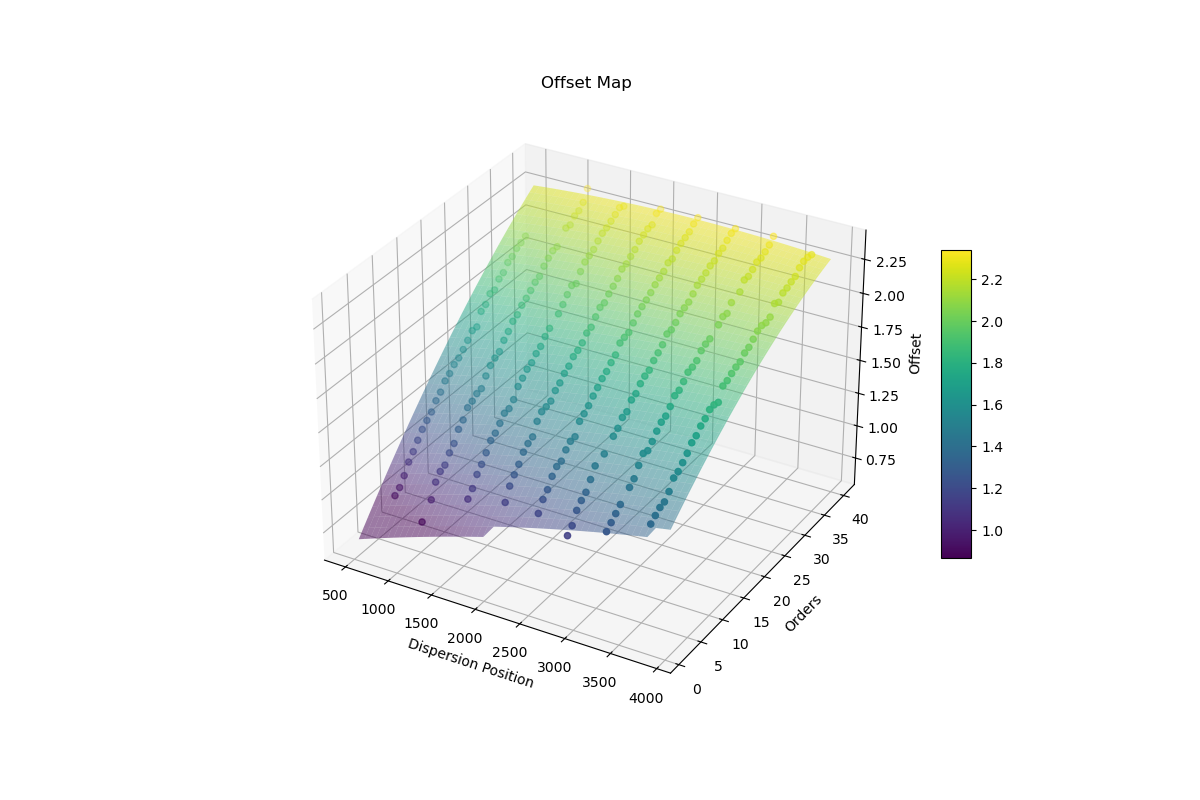

In [50]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
max_pixel = max([np.nanmax(order) for order in lc_pixel])+1
min_pixel = min([np.nanmin(order) for order in lc_pixel])

X, Y = np.meshgrid(np.arange(min_pixel, max_pixel, 1), ref_orders)
Z = surface_points
surf = ax.plot_surface(X, Y, Z, vmin=np.min(filtered_points[:,2]), vmax=np.max(filtered_points[:,2]), cmap='viridis', edgecolor='none', alpha=0.5)
points = ax.scatter(filtered_points[:,0], filtered_points[:,1], filtered_points[:,2], c=filtered_points[:,2], cmap='viridis', marker='o')
ax.set_title('Offset Map')
ax.set_xlabel('Dispersion Position')
ax.set_ylabel('Orders')
ax.set_zlabel('Offset')
fig.colorbar(points, shrink=0.5, aspect=10)
plt.show()

In [51]:
steps = np.diff(ref_wave[20])
steps[int(len(steps)/2)], np.nanmean(np.diff(ref_wave[20]))

(0.003910000000018954, 0.003933073529411786)

In [52]:
ref_wave[20][int(len(ref_wave[20])/2)]

721.55288

In [53]:
plt.close('all')

In [54]:
# # def multiInterp2(x, xp, fp):
# #     """
# #     Linear interpolation in 2D from Daniel F answer on Stack Overflow answered May 4, 2017.
# #     https://stackoverflow.com/questions/43772218/fastest-way-to-use-numpy-interp-on-a-2-d-array  
# #     """
# #     i = np.arange(x.size)
# #     j = np.searchsorted(xp, x) - 1
# #     d = (x - xp[j]) / (xp[j + 1] - xp[j])
# #     return (1 - d) * fp[i, j] + fp[i, j + 1] * d

# def interpolate_offsets_optimised(extracted_pixels, offsets, ref_wave, ref_pixel):
#     """
#     Interpolate wavelenght using pixel offsets.
#     """
#     # offset pixels
#     new_pixels = extracted_pixels - offsets
#     # new_wave = multiInterp2(new_pixels, ref_pixel, ref_wave)
#     new_wave = np.array([np.interp(new_pix, ref_pix, ref_w) for new_pix, ref_pix, ref_w in zip(new_pixels, ref_pixel, ref_wave)])
    
#     return new_wave

In [55]:
# def interpolate_offsets(extracted_pixels, offsets, lc_ref):
#     """
#     Interpolate wavelenght using pixel offsets.
#     """
#     # set offsets
#     new_pixels = extracted_pixels - offsets
       
#     new_wave = np.zeros_like(new_pixels)
#     for order in lc_ref['order']:
#         wave_ref, intensity_ref, pixel_ref = veloce_wavecalib.get_lc_order(lc_ref, order)
#         new_wave[order-1] = np.interp(new_pixels[order-1], pixel_ref, wave_ref)

#     return new_wave

In [56]:
# wave_1 = interpolate_offsets(extracted_pixels, surface_points, LC_ref)


In [57]:
wave = veloce_wavecalib.interpolate_offsets_optimised(lc_pixel, surface_points, ref_wave, ref_pixel)

In [58]:
# ref_wave_points = np.array([[p, o, w] for w, i, p, o in LC_ref])
# wave_points = np.array([[p, o, w] for w, p, o in zip(wave.flatten(), extracted_pixels.flatten(), Y.flatten())])
# wave_points = np.array([v for v in wave_points if np.all(v == v)])
    

In [59]:
# wave_points.shape

In [60]:
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')
# max_pixel = max([max(order) for order in lc_pixel])+1
# min_pixel = min([min(order) for order in lc_pixel])

# X, Y = np.meshgrid(np.arange(min_pixel, max_pixel, 1), ref_orders)
# # Z = offset_fit
# # Z = surface_points
# # surf = ax.plot_surface(X, Y, Z, vmin=np.min(offset_array), vmax=np.max(offset_array), cmap='viridis', edgecolor='none', alpha=0.5)
# # surf = ax.plot_surface(X, Y, wave, cmap='viridis', edgecolor='none', alpha=0.5)
# # surf = ax.plot_surface(dispersion_position, orders_position, surface_points, cmap='viridis', edgecolor='none', alpha=0.5)
# # points = ax.scatter(dispersion_position.flatten(), orders_position.flatten(), offset_array.flatten(), c=offset_array.flatten(), cmap='viridis', marker='o')
# points = ax.scatter(ref_wave_points[:,0], ref_wave_points[:,1], wave_points[:,2]-ref_wave_points[:,2], marker='.')
# ax.set_title('Wavelenght Map')
# ax.set_xlabel('Dispersion Position')
# ax.set_ylabel('Orders')
# ax.set_zlabel('wavelength')
# fig.colorbar(points, shrink=0.5, aspect=10)
# plt.show()

In [61]:
plt.close('all')

Text(0.5, 1.0, 'Order 35')

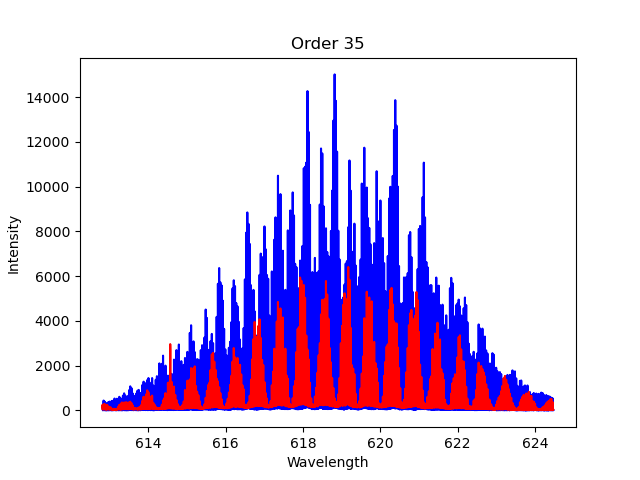

In [62]:
order = 35

# wave_ref, intensity_ref, pixel_ref = veloce_wavecalib.get_lc_order(LC_ref, order)
# wave_ref, intensity_ref, pixel_ref = ref_wave[order-1], ref_intensity[order-1], ref_pixel[order-1]

# _intensity = shift_lc_pixel(pixel_ref, lc_intensity[order-1], shift=2.0)

plt.plot(ref_wave[order-1], ref_intensity[order-1], 'b', label='Original')
plt.plot(wave[order-1], lc_intensity[order-1], 'r', label='Interpolated')
# plt.plot(wave_2[order-1], _intensity, 'g', label='Interpolated_fast')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title(f'Order {order}')

In [63]:
extracted_science_orders, extracted_order_imgs = veloce_reduction_tools.extract_orders_with_trace(
                        lc_image, traces, remove_background=False)

In [64]:
wave, flux = veloce_wavecalib.calibrate_simLC(extracted_science_orders, veloce_paths, lc_image, header, arm, plot=False)

Calibration Precision estimated at 748nm: 27 m/s


In [65]:
veloce_reduction_tools.save_extracted_spectrum_fits('tau_ceti_'+filename, wave, flux, header)

'tau_ceti_31oct30197.fits'